In [24]:
import re
import sys
import glob
from collections import Counter

import joblib
import numpy as np
import pandas as pd
from scipy import stats
from tqdm.notebook import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append('../src')
import const
from metrics import micro_f1_similarity, row_wise_micro_averaged_f1_score

pd.options.display.max_rows = 120

In [27]:
valid_df = pd.read_csv("../data/input/train_soundscape_labels.csv")

clip_framewise_outputs_dict = joblib.load("./clip_framewise_outputs_dict.pkl")
clip_clipwise_outputs_dict = joblib.load("./clip_clipwise_outputs_dict.pkl")

In [42]:
def show_outputs(audio_id, df=valid_df, c = 3001):
    audio_df = df[df["audio_id"] == int(audio_id)]
    
    plt.figure(figsize=(16, 70))
    for p in range(20):
        plt.subplot(20, 2, 2 * p + 1)
        for bc in np.argsort(np.max(clip_framewise_outputs_dict[audio_id][c * p: c * (p + 1), :], axis=0))[-5:]:
            plt.plot(clip_framewise_outputs_dict[audio_id][c * p: c * (p + 1), :][:, bc], label=const. INV_BIRD_CODE[bc])

        for t in range(6):
            if t % 2 == 0:
                color = "gray"
            else:
                color = "lightgrey"

            plt.axvspan(500 * t, 500 * (t + 1), color=color, alpha=0.1)
            plt.text(500 * t + 20, 0.93, s=p * 30 + (t + 1) * 5, fontsize=10, color="gray")
            plt.ylim([0, 1.0])

        plt.title(f"[Framewise] audio_id: {audio_id}, period: {p * 30} ~ {(p + 1) * 30} [sec]")
        plt.legend()
        
        clip_df = audio_df[(audio_df["seconds"] >= p * 30) & (audio_df["seconds"] < (p + 1) * 30)]
        clip_df_without_nocall = clip_df[clip_df["birds"] != "nocall"]
        clip_birds = clip_df_without_nocall["birds"].tolist()
        unique_birds = set(" ".join(clip_birds).split(" "))

        plt.subplot(20, 2, 2 * p + 2)
        plt.plot(clip_clipwise_outputs_dict[audio_id][p, :])
        top5_bc = np.argsort(clip_clipwise_outputs_dict[audio_id][p, :])[-5:]
        top5_bird = [const. INV_BIRD_CODE[bc] for bc in top5_bc[::-1]]
        for bc, y in enumerate(clip_clipwise_outputs_dict[audio_id][p, :]):
            if bc in top5_bc:
                plt.text(bc, min(y + 0.05, 1.05), s=const. INV_BIRD_CODE[bc])
        plt.title(f"[Clipwise]")
        
        for bird in unique_birds:
            plt.plot([0.0], label=bird, alpha=0.)
        plt.legend(title='True Label').get_title().set_fontsize(10)
        plt.ylim([0, 1.1])

    plt.tight_layout()

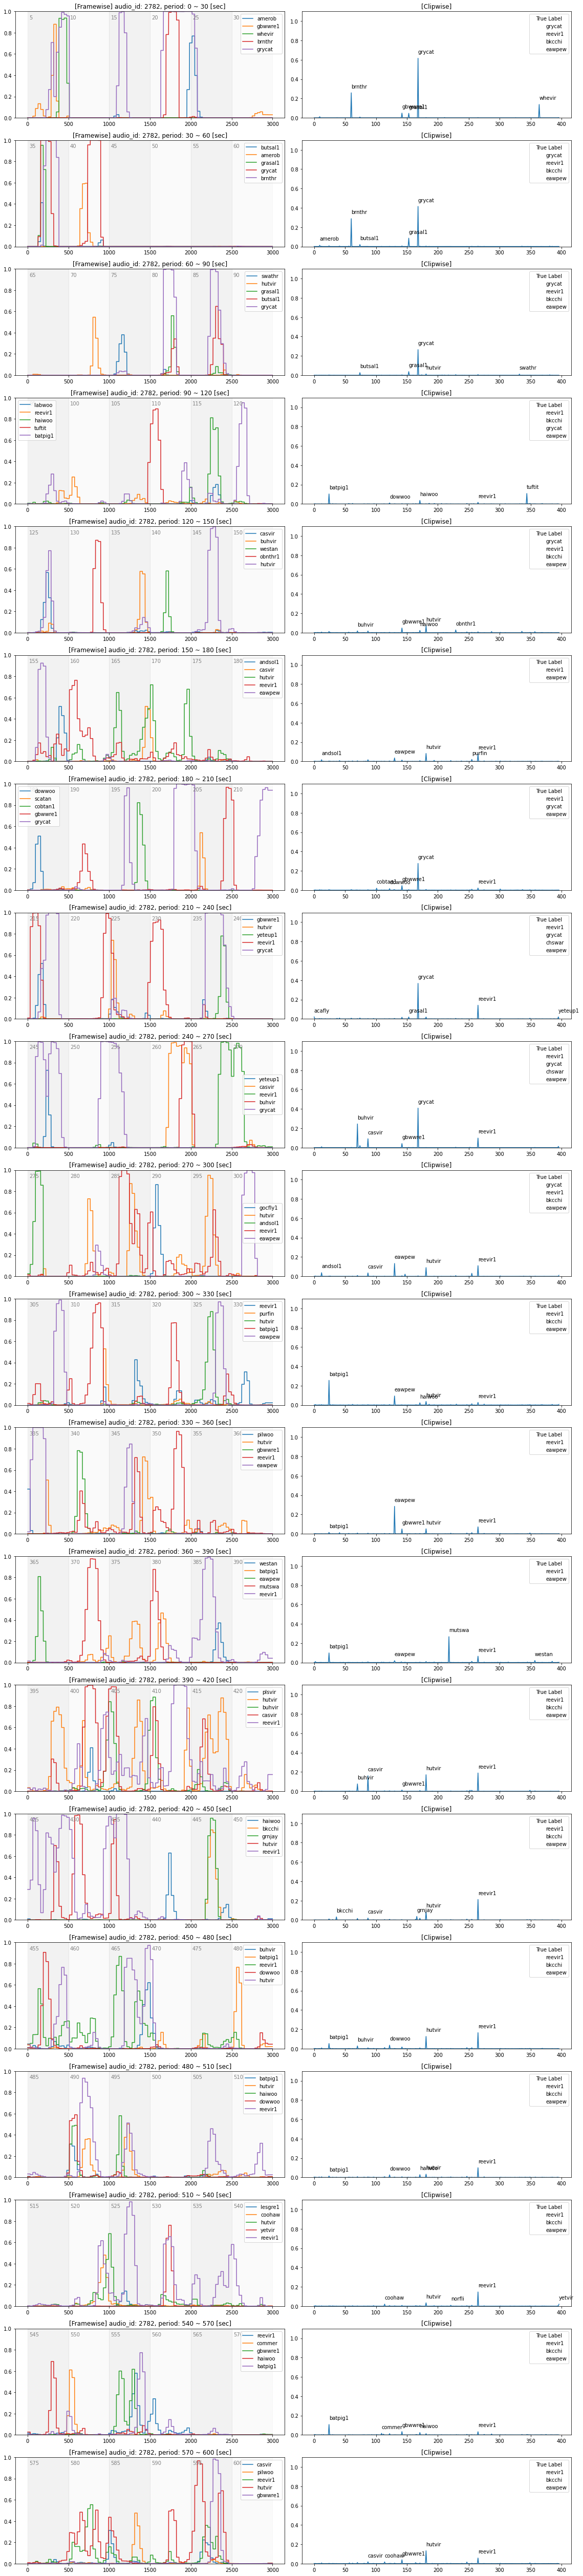

In [43]:
show_outputs("2782")